In [59]:
from sklearn.preprocessing import OneHotEncoder
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
import re
%matplotlib inline

* pkl 불러오기

In [ ]:
df = pd.read_pickle('data/main.pkl')
Dog = pd.read_pickle('data/Dog.pkl')
Cat = pd.read_pickle('data/Cat.pkl')

In [76]:
df.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Type
26724,A702446,Unnamed,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,30,Domestic Shorthair Mix,Brown Tabby/White,Mix
26725,A718934,Unnamed,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,90,Domestic Shorthair Mix,Brown Tabby,Mix
26726,A698128,Named,2015-03-09 13:33:00,Adoption,None,Dog,Neutered Male,1460,Old English Bulldog Mix,White/Tan,Mix
26727,A677478,Unnamed,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,28,Domestic Shorthair Mix,Black,Mix
26728,A706629,Unnamed,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,365,Domestic Shorthair Mix,Brown Tabby/White,Mix


In [67]:
Dog.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Type,AKC
0,A671945,0,2014-02-12 18:22:00,3,None,Dog,2,365,Shetland Sheepdog,Brown/White,0,0
2,A686464,0,2015-01-31 12:28:00,0,Foster,Dog,2,730,Bull Terrier,Blue/White,0,4
4,A667013,1,2013-11-15 12:52:00,4,Partner,Dog,2,730,Lhasa Apso,Tan,0,2
5,A677334,0,2014-04-25 13:04:00,4,Partner,Dog,0,30,Cairn Terrier,Black/Tan,0,4
8,A671784,0,2014-02-04 17:17:00,0,None,Dog,3,150,American Pit Bull Terrier,Red/White,0,4


In [63]:
Cat.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Type
26722,A687056,Unnamed,2014-08-31 09:00:00,Transfer,SCRP,Cat,Intact Male,150,Domestic Shorthair Mix,Orange Tabby,Mix
26724,A702446,Unnamed,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,30,Domestic Shorthair Mix,Brown Tabby/White,Mix
26725,A718934,Unnamed,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,90,Domestic Shorthair Mix,Brown Tabby,Mix
26727,A677478,Unnamed,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,28,Domestic Shorthair Mix,Black,Mix
26728,A706629,Unnamed,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,365,Domestic Shorthair Mix,Brown Tabby/White,Mix


## 더미화

In [6]:
df['AgeuponOutcome'] = df['AgeuponOutcome'].astype(int)
df['OutcomeType'] = df['OutcomeType'].astype(str)

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Dog['OutcomeType'] = encoder.fit_transform(Dog['OutcomeType'])
Dog['Name'] = encoder.fit_transform(Dog['Name'])
Dog['SexuponOutcome'] = encoder.fit_transform(Dog['SexuponOutcome'])
Dog['Type'] = encoder.fit_transform(Dog['Type'])
Dog['AKC'] = encoder.fit_transform(Dog['AKC'])

In [75]:
Dog.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Type,AKC
26716,A697158,0,2015-05-02 21:04:00,0,Offsite,Dog,2,60,Newfoundland,White/Black,0,6
26717,A519949,0,2014-06-30 17:34:00,3,None,Dog,3,3285,Bullmastiff,Black,0,6
26718,A701044,1,2015-04-28 14:26:00,0,None,Dog,2,60,Siberian Husky,Black/Tricolor,0,6
26723,A716997,0,2016-01-29 18:52:00,0,None,Dog,2,2190,American Staffordshire Terrier,Blue/White,0,4
26726,A698128,0,2015-03-09 13:33:00,0,None,Dog,2,1460,Old English Bulldog,White/Tan,0,2


In [33]:
X = Dog[['Name', 'SexuponOutcome', 'AgeuponOutcome', 'Type', 'AKC']]
y = Dog['OutcomeType']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## 분류나무 실행

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [36]:
clf = clf.fit(X_train, y_train)

In [38]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.619613543092
0.554757630162


In [39]:
clf.feature_importances_

array([ 0.06078098,  0.3430709 ,  0.40047953,  0.04290325,  0.15276534])

In [40]:
from IPython.display import Image
from sklearn import tree
import pydotplus 
import graphviz

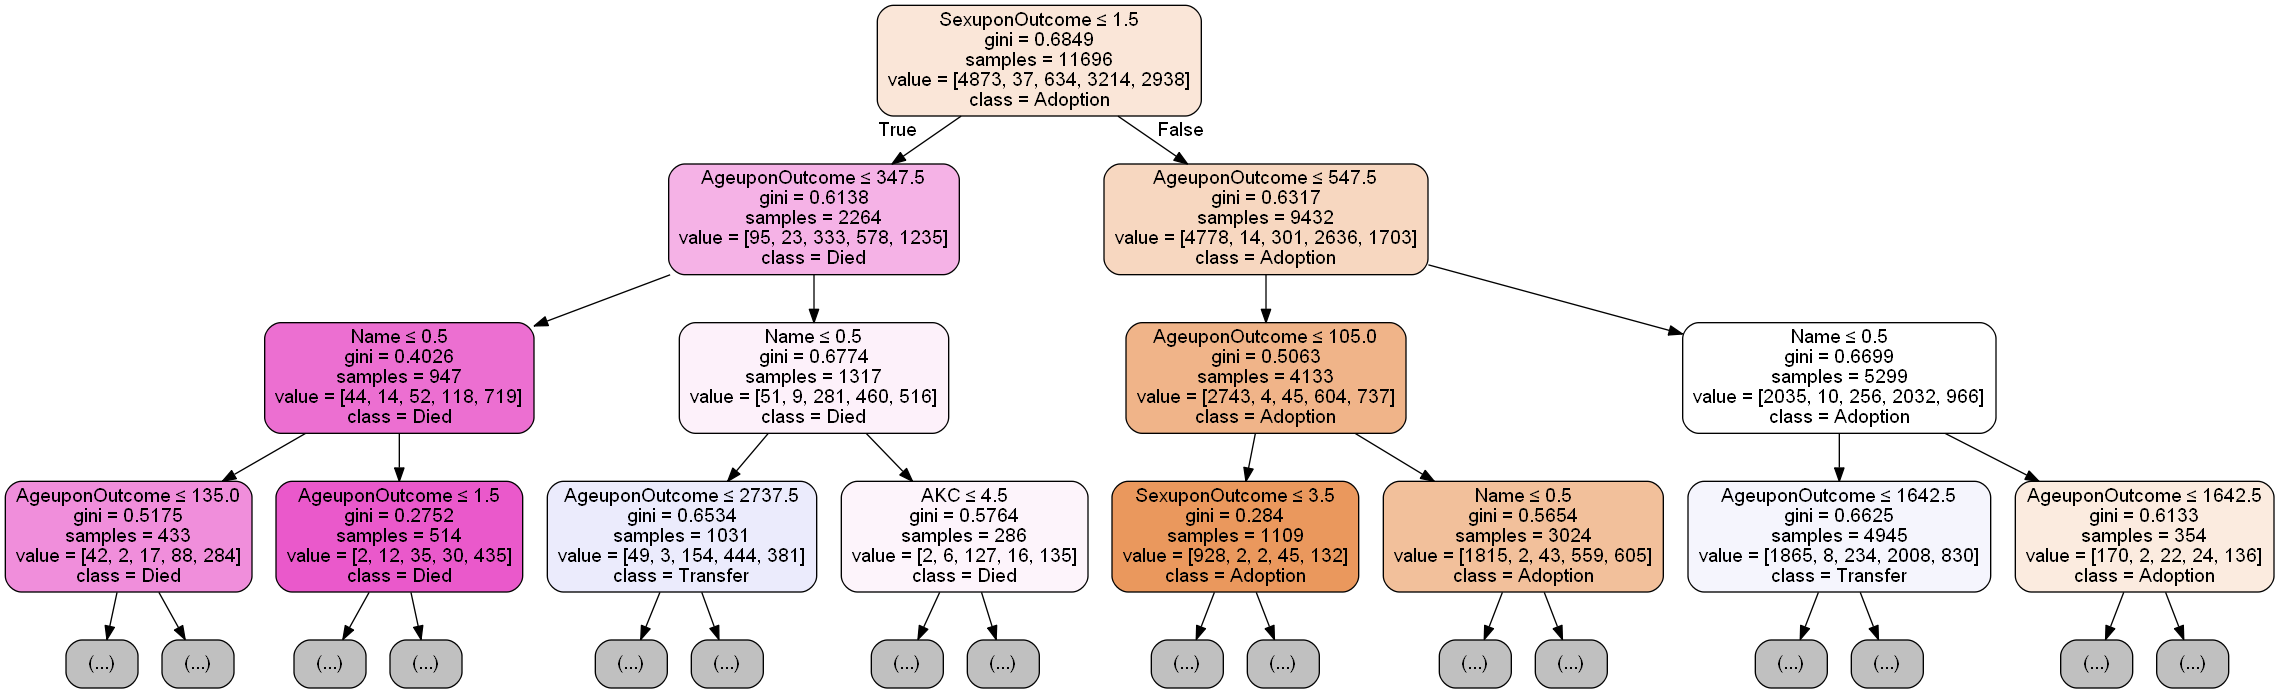

In [77]:
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True, max_depth=3,
                               feature_names=['Name', 'SexuponOutcome', 'AgeuponOutcome', 'Type', 'AKC'],
                               class_names=['Adoption', 'Euthanasia', 'Return to owner', 'Transfer', 'Died'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
forest = RandomForestClassifier(n_estimators=100, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [43]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.619613543092
0.561682482688


## Bagging

In [20]:
from sklearn.ensemble import BaggingClassifier

In [21]:
bagging = BaggingClassifier(DecisionTreeClassifier())

In [22]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [23]:
bagging.predict

<bound method BaggingClassifier.predict of BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)>

In [24]:
print(bagging.score(X_train, y_train))
print(bagging.score(X_test, y_test))

0.605164158687
0.556296486279


## XGBoost

In [47]:
import xgboost as xgb

In [48]:
xgbr = xgb.XGBRegressor(n_estimators=100)

In [49]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [50]:
from sklearn.metrics import mean_squared_error

In [57]:
print(xgbr.score(X_train, y_train))
print(xgbr.score(X_test, y_test))

0.238333619184
0.241137424045


In [52]:
mean_squared_error(y_train, xgbr.predict(X_train))

2.2437078533405148

In [53]:
y_pred = xgbr.predict(X_test)
mean_squared_error(y_test, y_pred)

2.2349980460383372

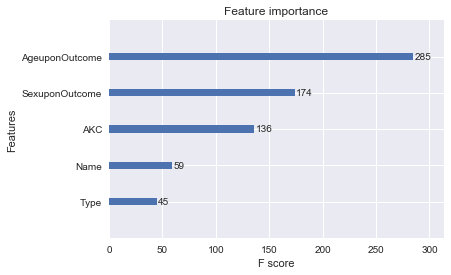

In [54]:
xgb.plot_importance(xgbr)

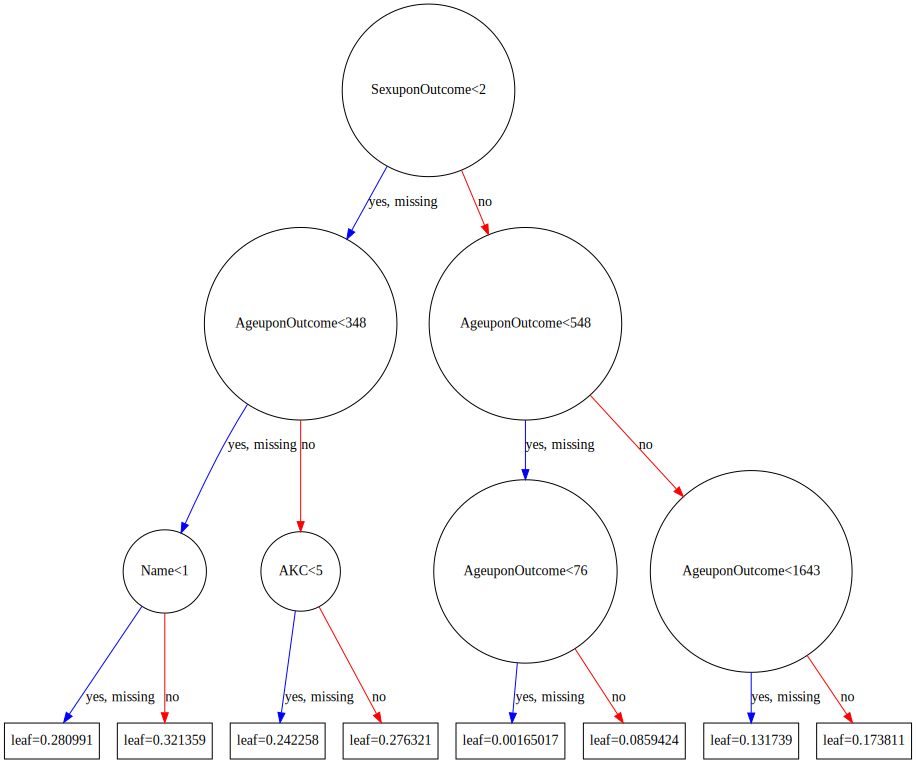

In [55]:
xgb.to_graphviz(xgbr, num_trees=0)